In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv('All_CSV/train.csv', usecols = ['Age', 'Survived', 'Fare'])

In [3]:
x = train.iloc[:, 1:]
y = train.iloc[:, 0:1]

In [4]:
from sklearn.model_selection import train_test_split as split

In [5]:
train_x, test_x, train_y, test_y = split(x, y, test_size = 0.2)

In [6]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [7]:
transformer = ColumnTransformer(transformers=[
    ('tnf', SimpleImputer(strategy='mean'), ['Age']),
    ('tnf2', StandardScaler(), ['Fare'])

], remainder='passthrough')

In [8]:
current_train_x = transformer.fit_transform(train_x)

In [9]:
current_test_x = transformer.fit_transform(test_x)

In [10]:
new_train_x = pd.DataFrame(current_train_x, columns = ['Age', 'Fare'])
new_test_x = pd.DataFrame(current_test_x, columns = ['Age', 'Fare'])

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Age is Already Normalised so dont need to Transform the function

/var/folders/c4/g4th1y192hlgglxhh6s94n8m0000gn/T/ipykernel_3085/700188797.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_train_x['Age'], ax = fig1)
/Users/sadi_/Coding/pythonProject/.venv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


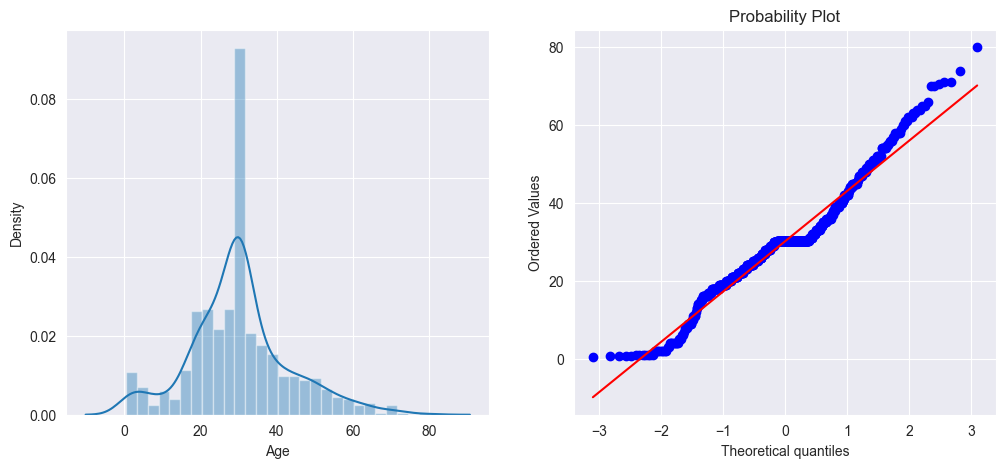

In [12]:
figure, (fig1, fig2) = plt.subplots(ncols=2, figsize=(12, 5))
fig1.set_title='Age'
sns.distplot(new_train_x['Age'], ax = fig1)
fig1.set_title='QQ PLOT'
stats.probplot(new_train_x['Age'], plot = fig2)
plt.show()

# Fare is not Normalised so i Need to Transform the function

/var/folders/c4/g4th1y192hlgglxhh6s94n8m0000gn/T/ipykernel_3085/1080294815.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_train_x['Fare'], ax = fig1)
/Users/sadi_/Coding/pythonProject/.venv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


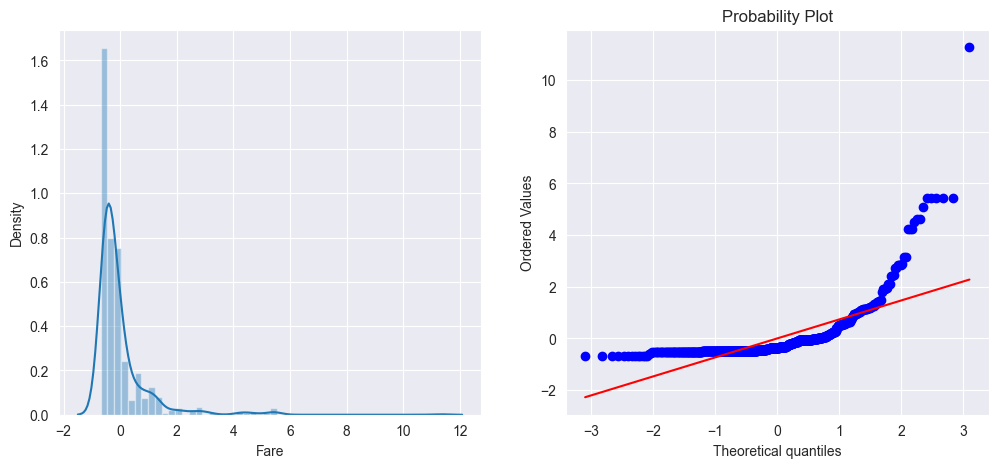

In [13]:
figure, (fig1, fig2) = plt.subplots(ncols=2, figsize=(12, 5))
fig1.set_title='Fare'
sns.distplot(new_train_x['Fare'], ax = fig1)
fig1.set_title='QQ PLOT'
stats.probplot(new_train_x['Fare'], plot = fig2)
plt.show()

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score as score

# Without Transformation

In [15]:
class1 = LogisticRegression()

In [16]:
class1.fit(new_train_x, train_y)

/Users/sadi_/Coding/pythonProject/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [17]:
pred_y1 = class1.predict(new_test_x)

In [18]:
print('Accuracy score : ', score(pred_y1, test_y))

Accuracy score :  0.6089385474860335


# With Function Transformation

In [19]:
from sklearn.preprocessing import FunctionTransformer

In [20]:
transformer = FunctionTransformer(func = np.log1p)
#transformer = FunctionTransformer(func=np.sqrt)
#transformer = FunctionTransformer(func=np.exp)
#transformer = FunctionTransformer(func=np.abs)
#transformer = FunctionTransformer(func=lambda x: np.power(x, 3))

In [21]:
transformed_train_x = transformer.fit_transform(new_train_x)

In [22]:
transformed_test_x = transformer.transform(new_test_x)

In [23]:
class2 = LogisticRegression()

In [24]:
class2.fit(transformed_train_x, train_y)

/Users/sadi_/Coding/pythonProject/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [25]:
pred_y2 = class2.predict(transformed_test_x)

In [26]:
print('Accuracy Score : ', score(pred_y2, test_y))

Accuracy Score :  0.659217877094972


/var/folders/c4/g4th1y192hlgglxhh6s94n8m0000gn/T/ipykernel_3085/2809965520.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_train_x['Fare'], ax = fig1)
/Users/sadi_/Coding/pythonProject/.venv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/c4/g4th1y192hlgglxhh6s94n8m0000gn/T/ipykernel_3085/2809965520.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code t

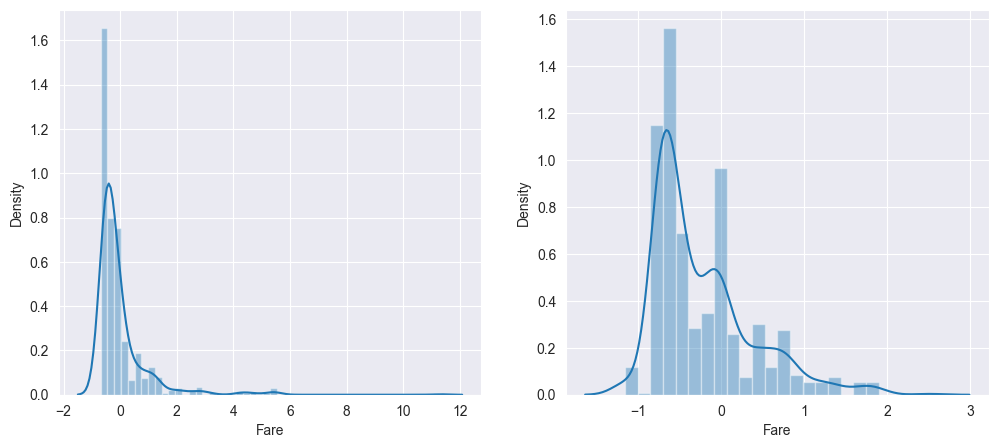

In [27]:
figure, (fig1, fig2) = plt.subplots(ncols=2, figsize=(12, 5))
fig1.set_title='Before'
sns.distplot(new_train_x['Fare'], ax = fig1)
fig1.set_title='After'
sns.distplot(transformed_train_x['Fare'], ax = fig2)
plt.show()

In [28]:
from sklearn.model_selection import cross_val_score

In [29]:
print('Cross Validation Score : ', np.mean(cross_val_score(class2, transformed_train_x, train_y, scoring='accuracy', cv = 10)))

Cross Validation Score :  0.6811424100156495


/Users/sadi_/Coding/pythonProject/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sadi_/Coding/pythonProject/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sadi_/Coding/pythonProject/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sadi_/Coding/pythonProject/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1310: DataConversionWarning

In [30]:
print('Cross Validation Score : ', np.mean(cross_val_score(class2, new_train_x, train_y, scoring='accuracy', cv = 10)))

Cross Validation Score :  0.6558294209702661


/Users/sadi_/Coding/pythonProject/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sadi_/Coding/pythonProject/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sadi_/Coding/pythonProject/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sadi_/Coding/pythonProject/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1310: DataConversionWarning